<a href="https://colab.research.google.com/github/DigDataSteve/Uber_NYC_Trip_Data_Single_Files/blob/main/UberRawData_Jan_Jun_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

trips = pd.read_csv('/content/gdrive/MyDrive/Uber_Data_Analysis/data/uber-raw-data-janjune-15.csv')
trips.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [5]:
trips.shape

(14270479, 4)

### Prepare Data for Analysis


1.   Find duplicate rows
2.   Remove duplicate rows by modifying the dataframe (via 'inplace=True')

In [16]:
trips.duplicated().sum()

898225

In [17]:
trips.drop_duplicates(inplace=True)

In [18]:
trips.shape

(13372254, 4)

In [19]:
trips.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

### What Are the Uber Trip Totals per Month in New York City?


1.   Need to convert the 'Pickup_date' to a Pandas datatime data type
2.   Extract the month by way of utilizing the datetime properties
3.   Count the number of rows per month
4.   Plot the counted monthly values



In [20]:
trips['Pickup_date'] = pd.to_datetime(trips['Pickup_date'], format='%Y-%m-%d %H:%M:%S')

In [21]:
trips['Pickup_date'].head()

0   2015-05-17 09:47:00
1   2015-05-17 09:47:00
2   2015-05-17 09:47:00
3   2015-05-17 09:47:00
4   2015-05-17 09:47:00
Name: Pickup_date, dtype: datetime64[ns]

In [22]:
trips['month'] = trips['Pickup_date'].dt.month
trips['month'].value_counts()

6    2571771
5    2483980
2    2222189
4    2112705
3    2062639
1    1918970
Name: month, dtype: int64

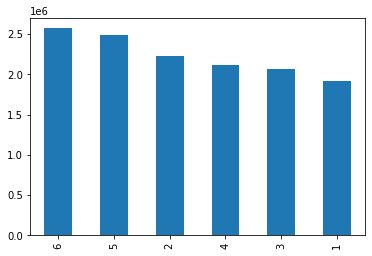

In [23]:
trips['month'].value_counts().plot(kind='bar')

### Count the total trips for the month and the weekdays within that month

In [24]:
trips['weekday'] = trips['Pickup_date'].dt.day_name()
trips['day'] = trips['Pickup_date'].dt.day
trips['hour'] = trips['Pickup_date'].dt.hour
trips['month'] = trips['Pickup_date'].dt.month
trips['minute'] = trips['Pickup_date'].dt.minute
trips.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-17 09:47:00,B02617,141,5,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,5,Sunday,17,9,47
2,B02617,2015-05-17 09:47:00,B02617,100,5,Sunday,17,9,47
3,B02617,2015-05-17 09:47:00,B02774,80,5,Sunday,17,9,47
4,B02617,2015-05-17 09:47:00,B02617,90,5,Sunday,17,9,47


### Find the Total Trips for Each Month and Each Weekday


1.   Group by month and then group by weekday
2.   Replace month number with month name via mapping a dictionary of month names
3.   Plot the number of trips by weekday per month



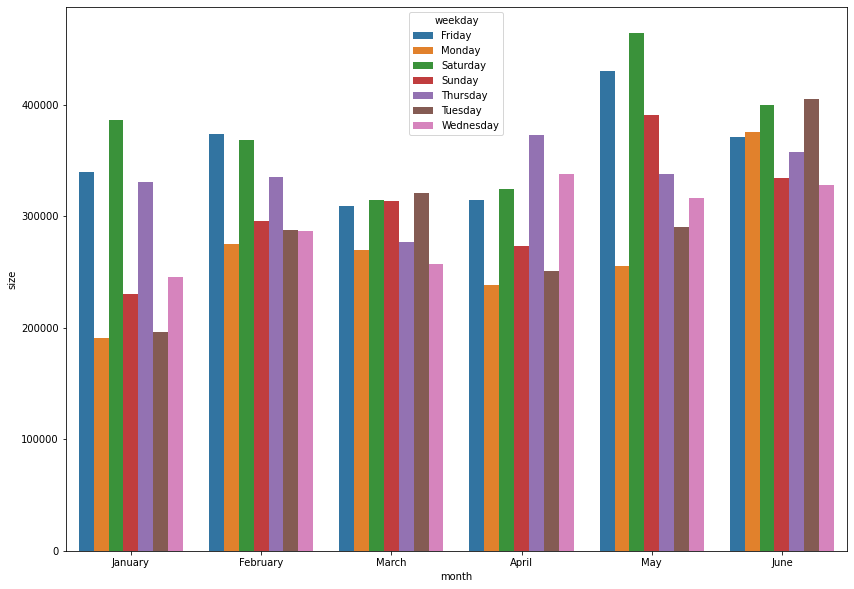

In [25]:
mn_day_trips = trips.groupby(['month', 'weekday'], as_index=False).size()
mn_day_trips['month'].unique()

#define month dictionary:
month_names = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June'}
mn_day_trips['month'] = mn_day_trips['month'].map(month_names)

#plot the number of trips by weekday per month; increase the viewing size of chart to 14X10
plt.figure(figsize=(14,10))
sns.barplot(x='month', y='size', hue='weekday', data=mn_day_trips)

### Calculate the Total Uber Trips per Hour per Day


1.   Count the number of rows by the hour per day
     *NOTE: using 'count()' will count each of the columns, whereas 'size()'
     will only count the columns nameed in the 'groupby'
2.   Plot the number of trips per hour by day



In [26]:
weekday_hrs = trips.groupby(['weekday', 'hour'], as_index=False).size()

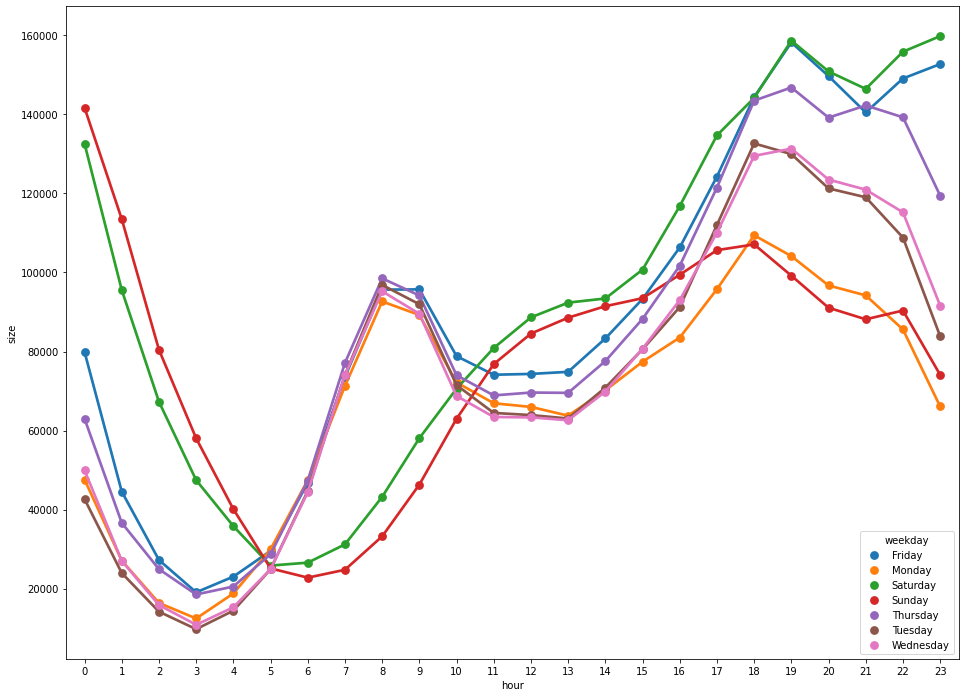

In [17]:
plt.figure(figsize=(16,12))
sns.pointplot(x='hour', y='size', hue='weekday', data=weekday_hrs)

### Load New Dataset for Further Uber Trip Analysis
## This dataset was obtained by FiveThirtyEight from the NYC Taxi & Limousine Commission (TLC) by submitting a Freedom of Information Law request on July 20, 2015. The data includes the number of active vehicles per dispatch base. There are a total of 6-dispatch bases.


1.   Load new dataset into Pandas object
2.   Install chart_studio, plotly, and plotly modules
3.   Run a box plot to show interesting statistical information on the dispatch bases
4.   Run a violin plot to show the distribution of the active vehicles plus the same statistical information as the box plot




In [27]:
uber_foil = pd.read_csv('/content/gdrive/MyDrive/Uber_Data_Analysis/data/Uber-Jan-Feb-FOIL.csv')
uber_foil.head(100)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
95,B02598,1/16/2015,1079,9838
96,B02598,1/17/2015,974,9546
97,B02512,1/17/2015,201,1281
98,B02682,1/17/2015,1137,11382


In [7]:
!pip install chart_studio
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import chart_studio.plotly as csp
import plotly.graph_objects as go
import plotly.express as px

In [9]:
px.box(x='dispatching_base_number', y='active_vehicles', data_frame=uber_foil)

In [10]:
px.violin(x='dispatching_base_number', y='active_vehicles', data_frame=uber_foil)